# 📊 Cancer Patients Dataset - Exploratory Data Analysis (EDA)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display
%matplotlib inline
sns.set_style('whitegrid')

# Load dataset
df = pd.read_csv("C:/Users/hp/Desktop/Cancer Python/_cancer_dataset_uae.csv", header=0)  # Change filename if needed
df.head()
    

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


## ✅ Basic Overview

In [3]:

df.info()
df.describe()
df.isnull().sum()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

## 📅 Handle Dates

In [10]:
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], format='%d/%m/%Y', errors='coerce')
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'], format='%d/%m/%Y', errors='coerce')
df['Death_Date'] = pd.to_datetime(df['Death_Date'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Diagnosis_Year'] = df['Diagnosis_Date'].dt.year


## ✅ Patient Demographics

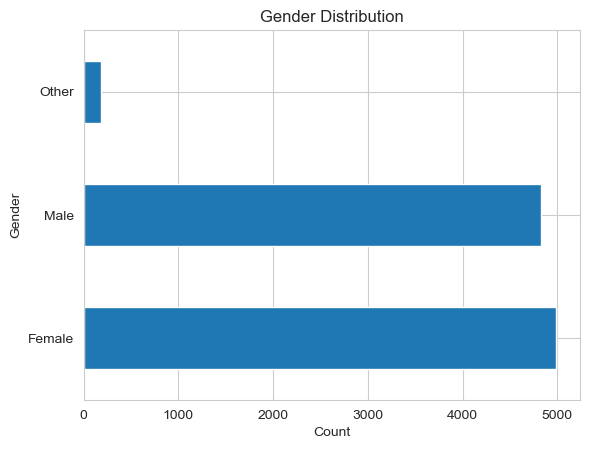

In [13]:

df['Gender'].value_counts().plot(kind='barh', title='Gender Distribution')
plt.xlabel('Count')
plt.show()
    

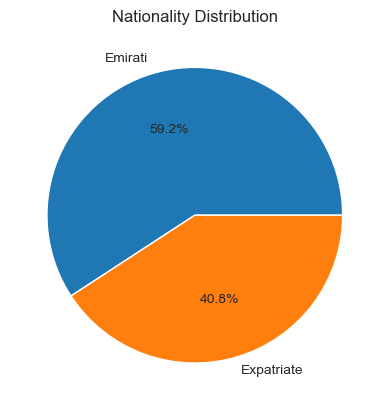

In [15]:

df['Nationality'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Nationality Distribution')
plt.ylabel('')
plt.show()
    

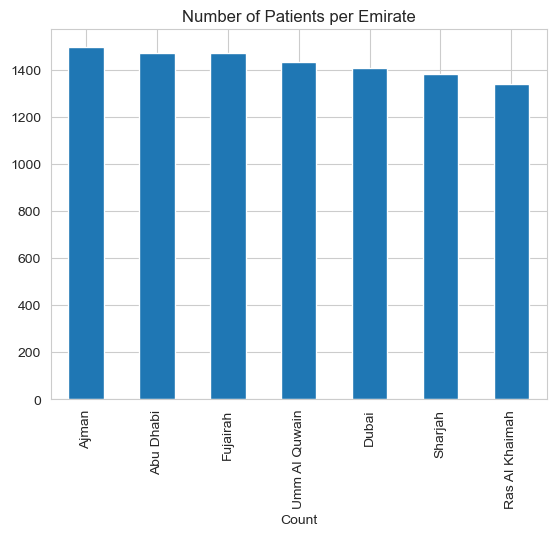

In [17]:

df['Emirate'].value_counts().plot(kind='bar', title='Number of Patients per Emirate')
plt.xlabel('Count')
plt.show()
    

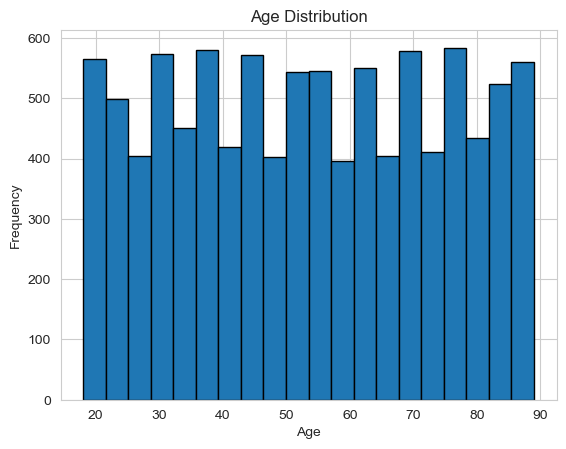

In [19]:

df['Age'].plot(kind='hist', bins=20, edgecolor='black', title='Age Distribution')
plt.xlabel('Age')
plt.show()
    

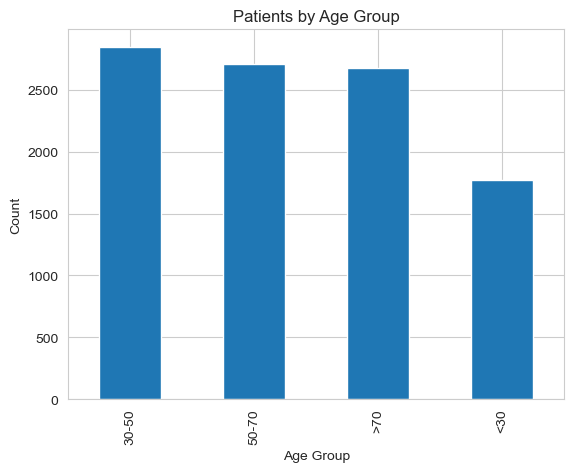

In [21]:

bins = [0, 30, 50, 70, 100]
labels = ['<30', '30-50', '50-70', '>70']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['Age_Group'].value_counts().plot(kind='bar', title='Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
    

## ✅ Cancer Insights

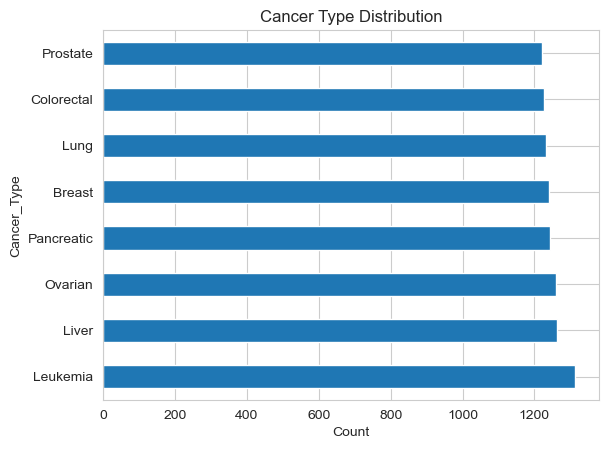

In [24]:

df['Cancer_Type'].value_counts().plot(kind='barh', title='Cancer Type Distribution')
plt.xlabel('Count')
plt.show()
    

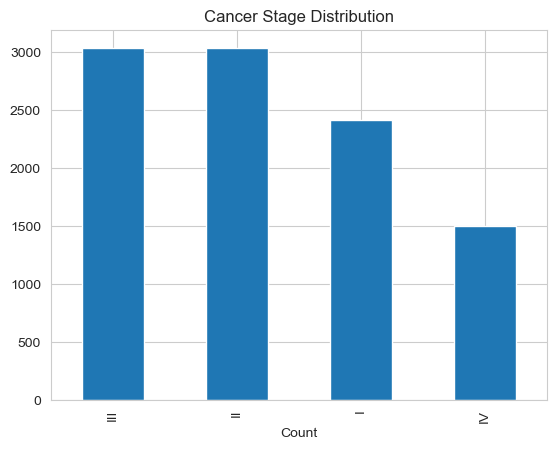

In [26]:

df['Cancer_Stage'].value_counts().plot(kind='bar', title='Cancer Stage Distribution')
plt.xlabel('Count')
plt.show()
    

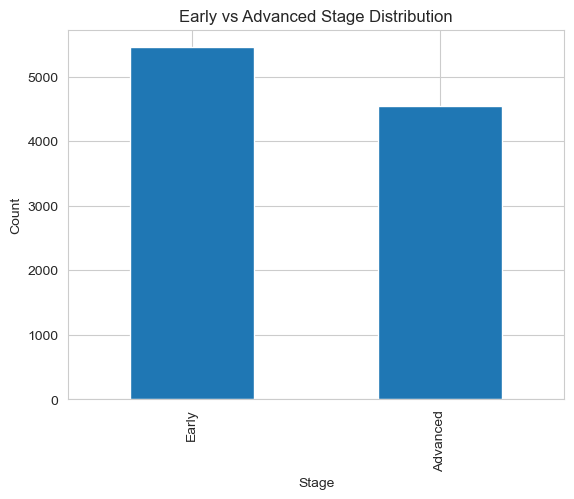

In [28]:

stage_map = {'I':'Early', 'II':'Early', 'III':'Advanced', 'IV':'Advanced'}
df['Stage_Category'] = df['Cancer_Stage'].map(stage_map)
df['Stage_Category'].value_counts().plot(kind='bar', title='Early vs Advanced Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()
    

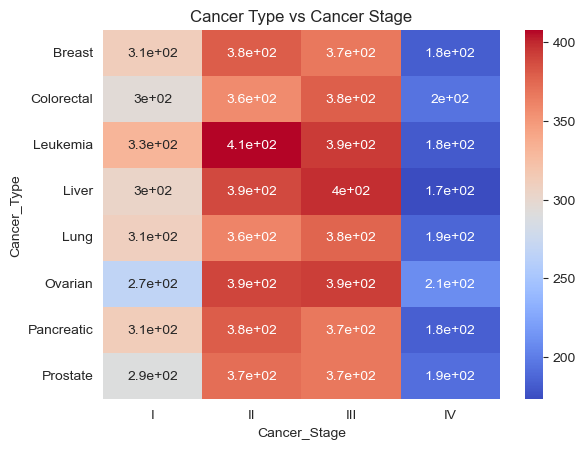

In [30]:

cancer_stage_matrix = pd.crosstab(df['Cancer_Type'], df['Cancer_Stage'])
sns.heatmap(cancer_stage_matrix, annot=True, cmap='coolwarm')
plt.title('Cancer Type vs Cancer Stage')
plt.show()
    

## ✅ Treatment Analysis

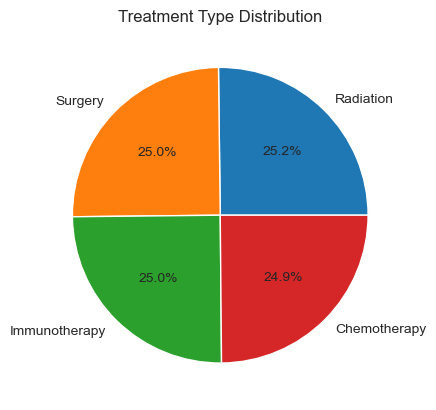

In [50]:

df['Treatment_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Treatment Type Distribution')
plt.ylabel('')
plt.show()
    

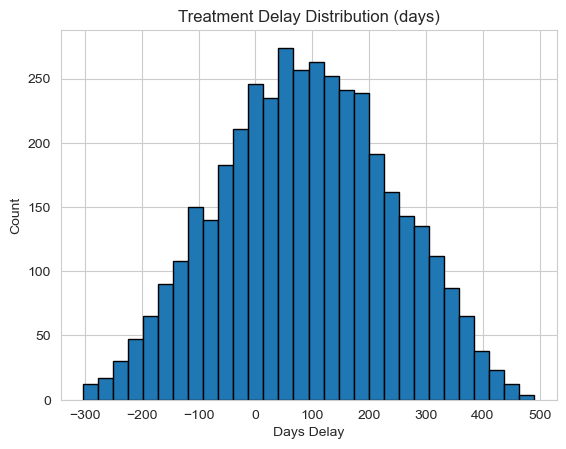

In [52]:

df['Treatment_Delay'] = (df['Treatment_Start_Date'] - df['Diagnosis_Date']).dt.days
df['Treatment_Delay'].hist(bins=30, edgecolor='black')
plt.title('Treatment Delay Distribution (days)')
plt.xlabel('Days Delay')
plt.ylabel('Count')
plt.show()
    

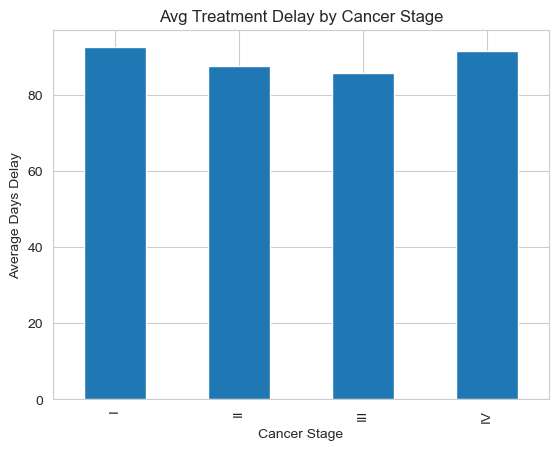

In [53]:

df.groupby('Cancer_Stage')['Treatment_Delay'].mean().plot(kind='bar', title='Avg Treatment Delay by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Average Days Delay')
plt.show()
    

## ✅ Outcome and Mortality

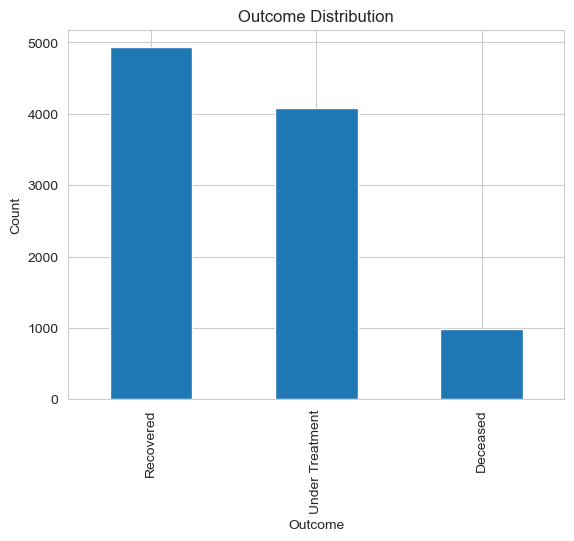

In [57]:

df['Outcome'].value_counts().plot(kind='bar', title='Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()
    

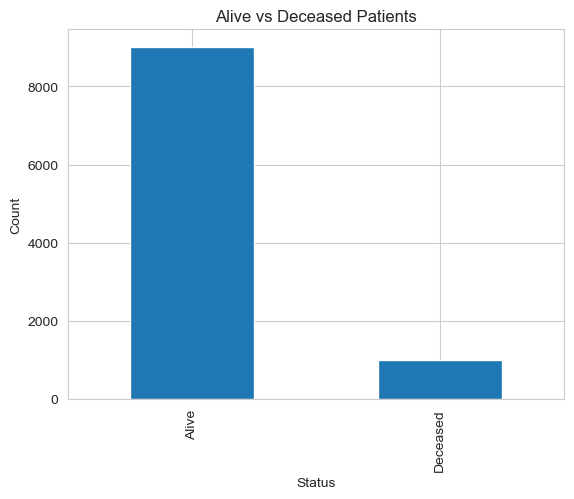

In [59]:

df['Mortality_Status'] = df['Death_Date'].apply(lambda x: 'Deceased' if pd.notna(x) else 'Alive')
df['Mortality_Status'].value_counts().plot(kind='bar', title='Alive vs Deceased Patients')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
    

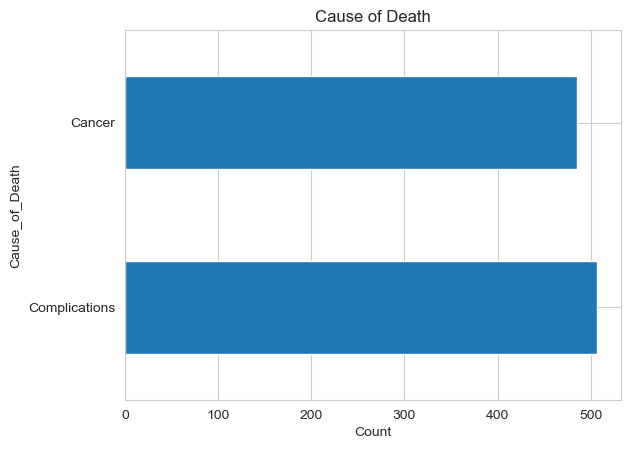

In [61]:
df['Cause_of_Death'] = df['Cause_of_Death'].replace({'N/A': np.nan})
df['Cause_of_Death'].dropna().value_counts().plot(kind='barh', title='Cause of Death')
plt.xlabel('Count')
plt.show()


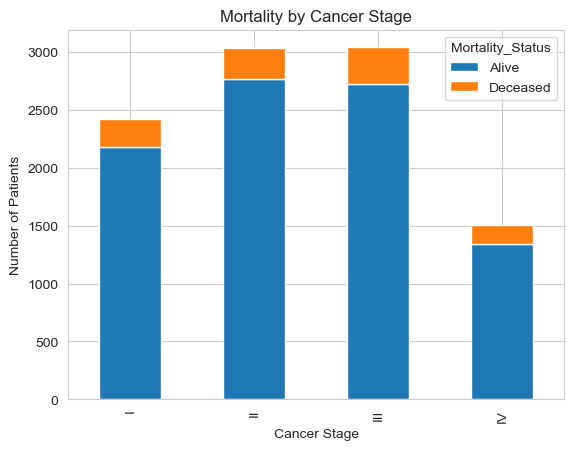

In [63]:

mortality_stage = pd.crosstab(df['Cancer_Stage'], df['Mortality_Status'])
mortality_stage.plot(kind='bar', stacked=True, title='Mortality by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()
    

## ✅ BMI Analysis

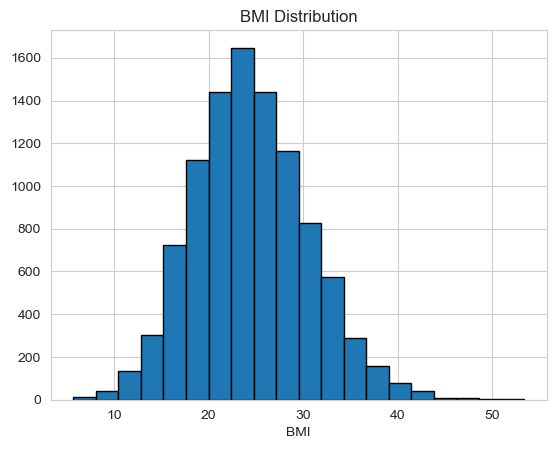

In [66]:

df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
df['BMI'].hist(bins=20, edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()
    

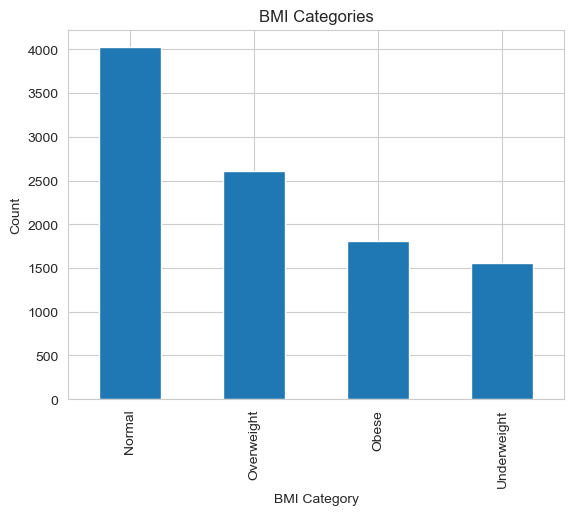

In [68]:

def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    elif bmi < 25: return 'Normal'
    elif bmi < 30: return 'Overweight'
    else: return 'Obese'
df['BMI_Category'] = df['BMI'].apply(bmi_category)
df['BMI_Category'].value_counts().plot(kind='bar', title='BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()
    

## ✅ Physician Outcome Comparison

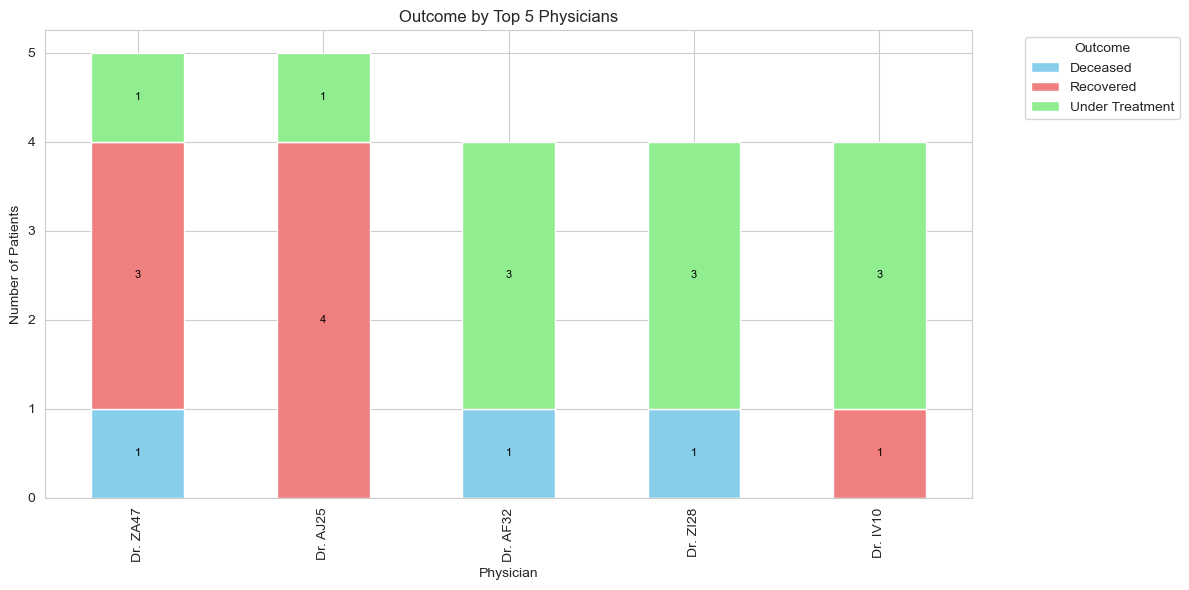

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Cross-tabulate Primary_Physician and Outcome
physician_outcome = pd.crosstab(df['Primary_Physician'], df['Outcome'])

# Calculate total patients per physician
physician_total = physician_outcome.sum(axis=1).sort_values(ascending=False)

# Select top 5 physicians
top_5_physicians = physician_total.head(5)
filtered_physician_outcome = physician_outcome.loc[top_5_physicians.index]

# Plot stacked bar chart
filtered_physician_outcome.plot(kind='bar', stacked=True, title='Outcome by Top 5 Physicians', figsize=(12, 6), color=['skyblue', 'lightcoral', 'lightgreen'])

# Customize plot
plt.xlabel('Physician')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Add value annotations
for container in plt.gca().containers:
    for patch in container:
        height = patch.get_height()
        if height > 0:  # Only annotate non-zero values
            plt.gca().annotate(
                f'{int(height)}',
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_y() + height / 2),
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )

# Show plot
plt.tight_layout()
plt.show()

# Summary

In [144]:
# Create a crosstab to show Cancer Type → Cancer Stage → Outcome counts
summary = pd.crosstab(
    [df['Cancer_Type'], df['Cancer_Stage']],
    df['Outcome']
)

# Display the summary table
summary



Outcome                   Deceased  Recovered  Under Treatment
Cancer_Type Cancer_Stage                                      
Breast      I                   31        157              123
            II                  38        187              155
            III                 33        185              149
            IV                  18         85               80
Colorectal  I                   21        147              127
            II                  35        170              152
            III                 32        192              155
            IV                  21        109               65
Leukemia    I                   29        164              138
            II                  32        203              173
            III                 48        198              148
            IV                  18         95               68
Liver       I                   31        148              125
            II                  25        211              152
            III                 33        196              169
            IV                  26         75               72
Lung        I                   30        158              121
            II                  44        175              142
            III                 37        188              151
            IV                  21         94               72
Ovarian     I                   30        130              107
            II                  30        190              170
            III                 45        177              171
            IV                  23        104               82
Pancreatic  I                   44        145              123
            II                  30        203              147
            III                 47        168              152
            IV                  24         78               82
Prostate    I                   25        139              126
            II                  34        191              147
            III                 42        176              149
            IV                  15         93               84

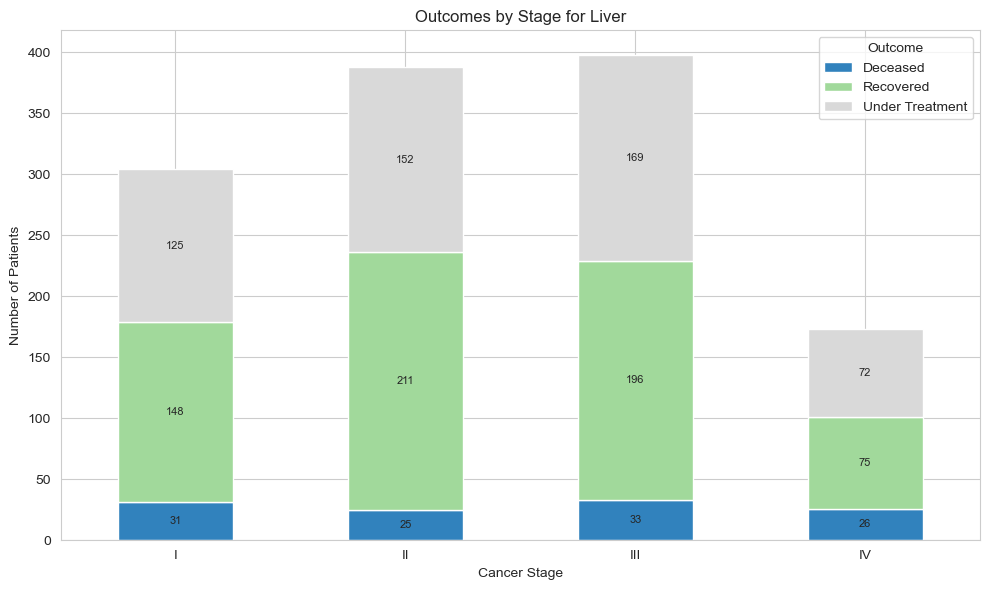

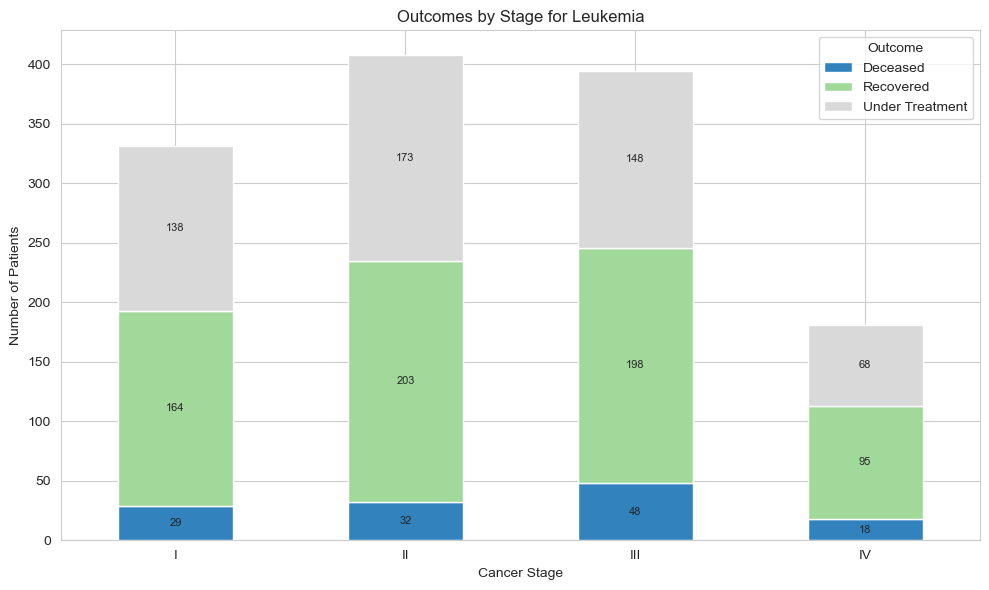

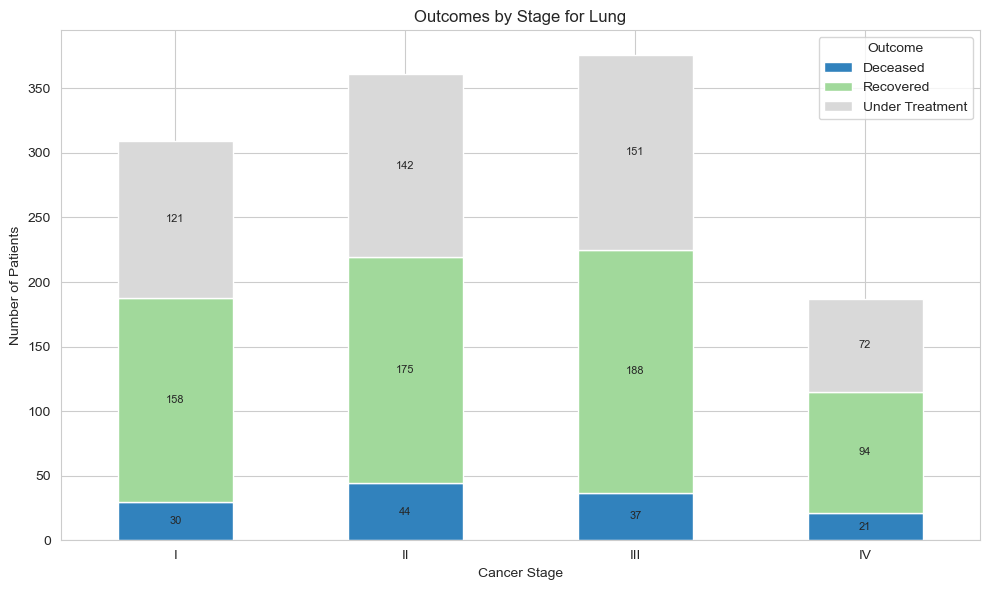

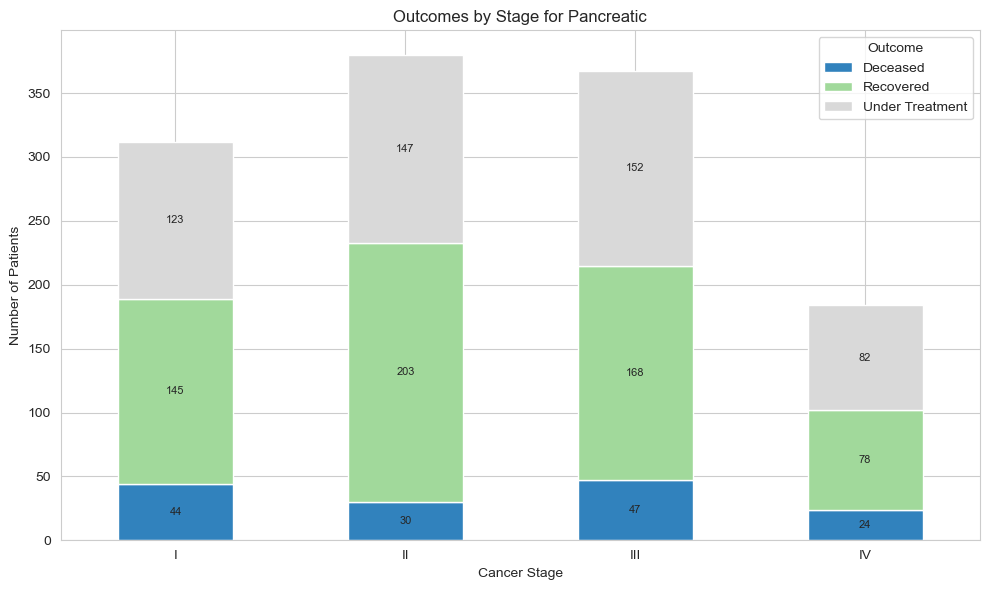

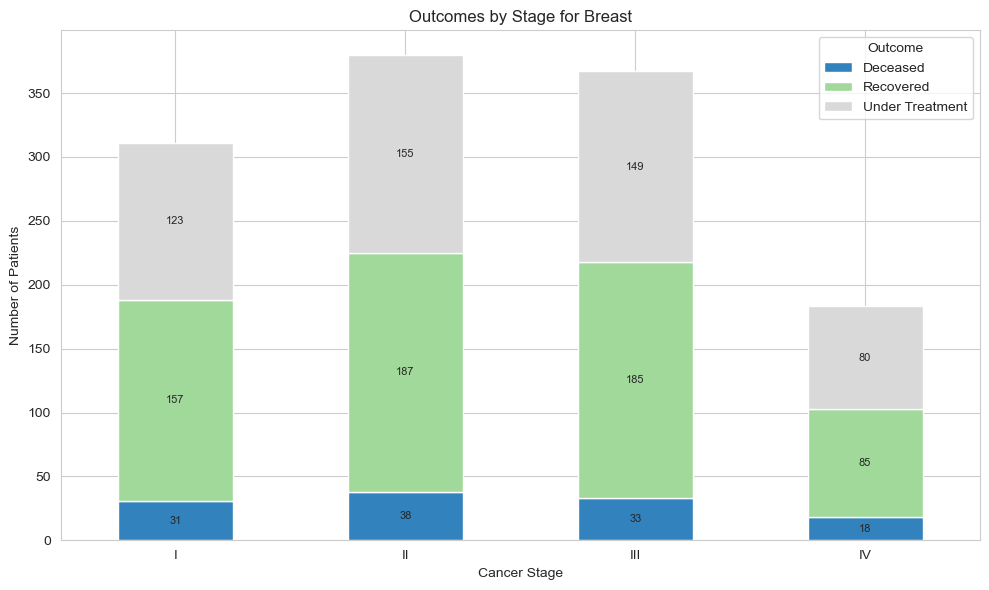

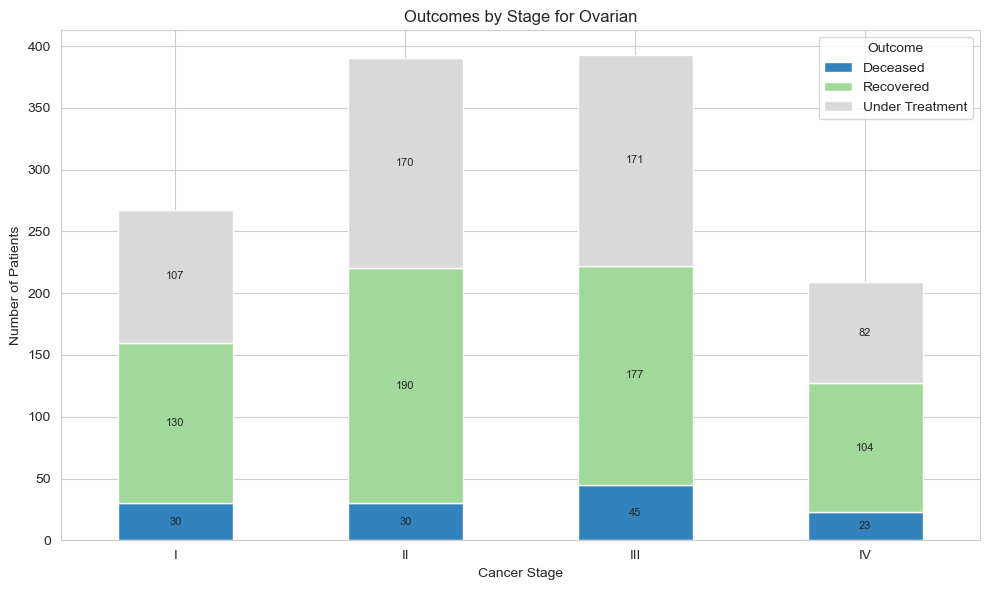

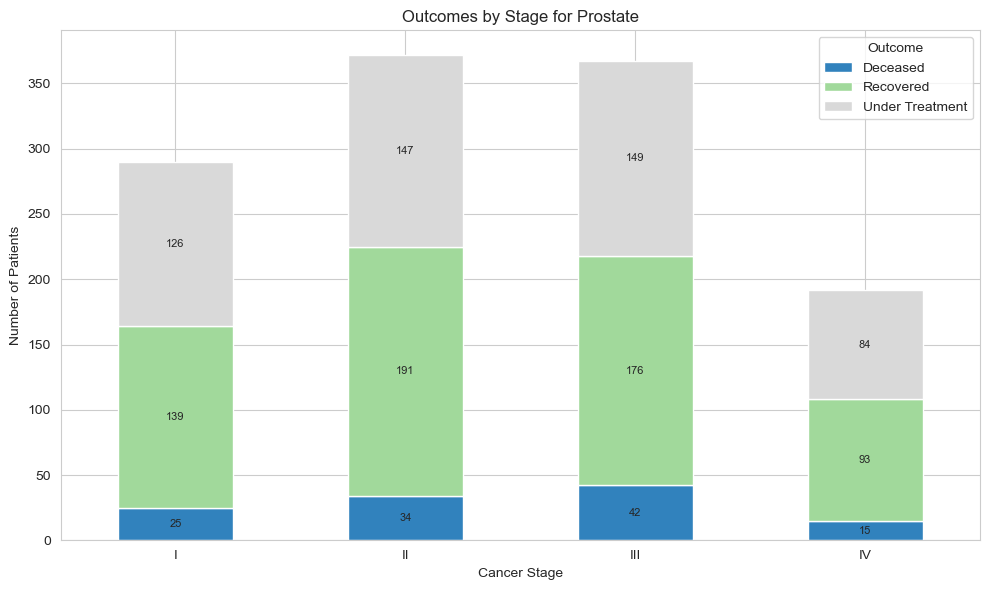

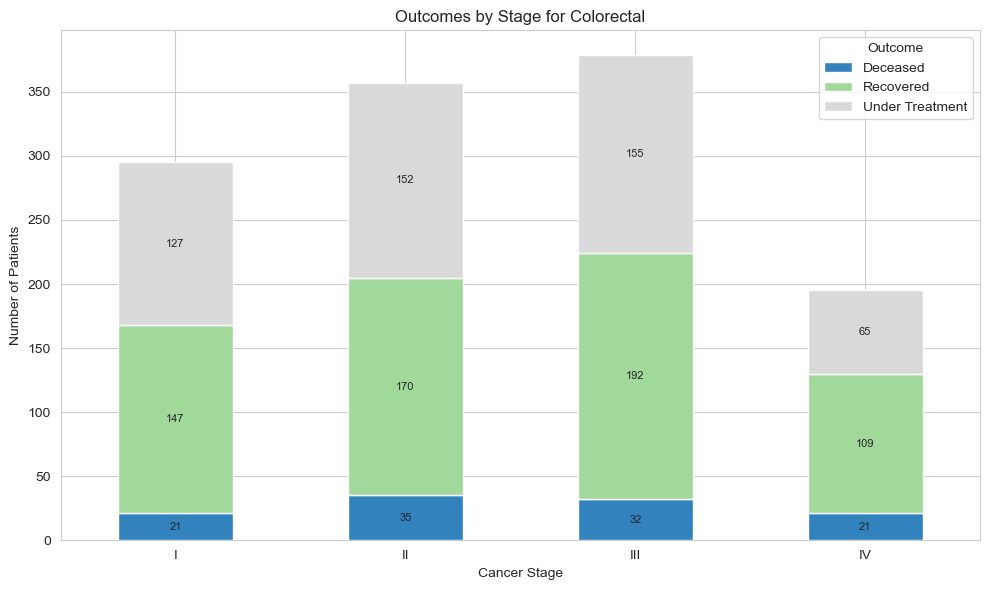

In [138]:
import matplotlib.pyplot as plt

# Get list of unique cancer types
cancer_types = df['Cancer_Type'].dropna().unique()

# Loop over each cancer type to create individual plots
for cancer in cancer_types:
    # Filter data for that cancer type
    cancer_df = df[df['Cancer_Type'] == cancer]
    
    # Create crosstab of Stage vs Outcome counts
    summary = pd.crosstab(cancer_df['Cancer_Stage'], cancer_df['Outcome'])
    
    # Plot
    ax = summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
    plt.title(f'Outcomes by Stage for {cancer}')
    plt.xlabel('Cancer Stage')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=0)
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()


In [183]:
# STEP 0: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 1: Clean column names
df.columns = df.columns.str.strip()

# STEP 2: Define Features and Target
X = df.drop(columns=['Cause_of_Death_Encoded'])
y = df['Cause_of_Death_Encoded']

# STEP 3: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 4: Handle Missing Values (Impute with Mean for Numeric Columns)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# STEP 5: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# STEP 6: Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# STEP 7: Make Predictions and Evaluate
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.46733668341708545

📊 Confusion Matrix:
 [[51 55]
 [51 42]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       106
           1       0.43      0.45      0.44        93

    accuracy                           0.47       199
   macro avg       0.47      0.47      0.47       199
weighted avg       0.47      0.47      0.47       199

